# Machine Learning for San Diego

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ryan
[nltk_data]     Luu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#path = 'C:/Users/Ryan/Documents/Github/ML-SD-Project/'
path = 'C:/Users/Ryan Luu/Documents/Github/ML-SD-Project/'

df = pd.read_csv(path+'data/get_it_done_2019_requests_datasd_v1.csv')

In [3]:
df.head()

,service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,service_name,case_record_type,date_updated,status,lat,lng,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,public_description
0,2475207,NaN,NaN,2019-01-01T00:20:00,NaN,Other,TSW,NaN,Referred,32.710427,-117.145192,8.0,37.0,Southeastern San Diego,NaN,Mobile,This report has been referred to Police CRO ? ...,19th and 20th island ave people firing gun sho...
1,2475208,NaN,NaN,2019-01-01T00:20:00,NaN,Other,TSW,NaN,Referred,32.702298,-117.092751,4.0,11.0,Encanto Neighborhoods,NaN,Mobile,This report has been referred to Police CRO ? ...,Ongoing loud fireworks in area near El Rey Tra...
2,2475209,NaN,NaN,2019-01-01T00:21:00,15.0,Litter,ESD Complaint/Report,2019-01-15T00:00:00,Closed,32.719797,-117.060215,4.0,11.0,Encanto Neighborhoods,NaN,Mobile,NaN,3 bags of garbage and one box
3,2475210,NaN,4.030009e+10,2019-01-01T01:06:00,189.0,Street Sweeping,TSW,2019-07-09T00:00:00,Closed,32.702164,-117.051741,4.0,44.0,Skyline-Paradise Hills,NaN,Web,NaN,North side of Skyline Drive from Cielo to Wood...
4,2475211,NaN,4.030009e+10,2019-01-01T01:12:00,18.0,Engineering - Traffic Calming/Safety Features,Traffic Engineering,2019-01-18T00:00:00,Closed,32.829445,-117.279999,1.0,10.0,La Jolla,NaN,Mobile,NaN,"On December 13, 2018, this delivery truck back..."


In [4]:
print("There are " + str(df.shape[0]) + " observations and " + str(df.shape[1]) + " variables.")

There are 269345 observations and 18 variables.


# Data Cleaning and Manipulation

In [5]:
# Remove unnecessary columns
df = df.drop(["service_request_id", "service_request_parent_id", "sap_notification_number"], axis=1)

In [6]:
 
# Convert back into datetime64
df['date_requested'] = pd.to_datetime(df['date_requested'])

# Extract date, month, time
df['date'] = df.date_requested.dt.date 
df['month'] = df.date_requested.dt.month
df['time'] = df.date_requested.dt.time


# Make new Season Variable
df['season'] = (df.date_requested.dt.month%12 + 3)//3

# Make new DOW variable
df['dow'] = df['date'].apply(lambda x: pd.Timestamp(str(x)).weekday_name)


# Drop date_requested
#df = df.drop(["date_requested"], axis=1)

# Setting Conditions for Dataframe
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)
df2 = df[(df['lat'] > 32.5444) &
        (df['lat'] < 33.4274) &
        (df['lng'] < -117.0301) &
        (df['lng'] > -117.6126) &
        (df['status'] == 'Closed')]

df2.head()

C:\Users\Ryan Luu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


,date_requested,case_age_days,service_name,case_record_type,date_updated,status,lat,lng,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,public_description,date,month,time,season,dow
2,2019-01-01 00:21:00,15.0,Litter,ESD Complaint/Report,2019-01-15T00:00:00,Closed,32.719797,-117.060215,4.0,11.0,Encanto Neighborhoods,NaN,Mobile,NaN,3 bags of garbage and one box,2019-01-01,1,00:21:00,1,Tuesday
3,2019-01-01 01:06:00,189.0,Street Sweeping,TSW,2019-07-09T00:00:00,Closed,32.702164,-117.051741,4.0,44.0,Skyline-Paradise Hills,NaN,Web,NaN,North side of Skyline Drive from Cielo to Wood...,2019-01-01,1,01:06:00,1,Tuesday
4,2019-01-01 01:12:00,18.0,Engineering - Traffic Calming/Safety Features,Traffic Engineering,2019-01-18T00:00:00,Closed,32.829445,-117.279999,1.0,10.0,La Jolla,NaN,Mobile,NaN,"On December 13, 2018, this delivery truck back...",2019-01-01,1,01:12:00,1,Tuesday
6,2019-01-01 01:40:00,9.0,72 Hour Violation,Parking,2019-01-09T00:00:00,Closed,32.847680,-117.217800,1.0,99.0,University,NaN,Web,NaN,Vehicle was left by a tow truck and has not mo...,2019-01-01,1,01:40:00,1,Tuesday
7,2019-01-01 05:43:00,175.0,Remove/Spray Weeds,TSW,2019-06-25T00:00:00,Closed,32.774575,-117.168603,7.0,12.0,Linda Vista,NaN,Mobile,NaN,Tumbleweed located in the south direction of U...,2019-01-01,1,05:43:00,1,Tuesday


# Exploratory Data Analysis

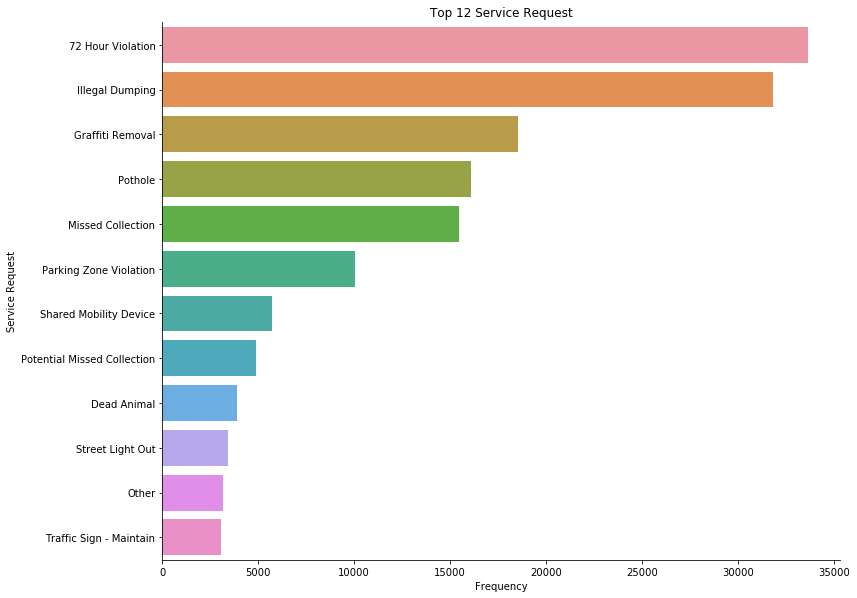

In [7]:
a= sns.catplot(y = 'service_name',
           kind = 'count',
           height = 8,
           aspect = 1.5,
           order = df2.service_name.value_counts().head(12).index,
           data = df2)
plt.title("Top 12 Service Request")
a.set(xlabel='Frequency', ylabel='Service Request')

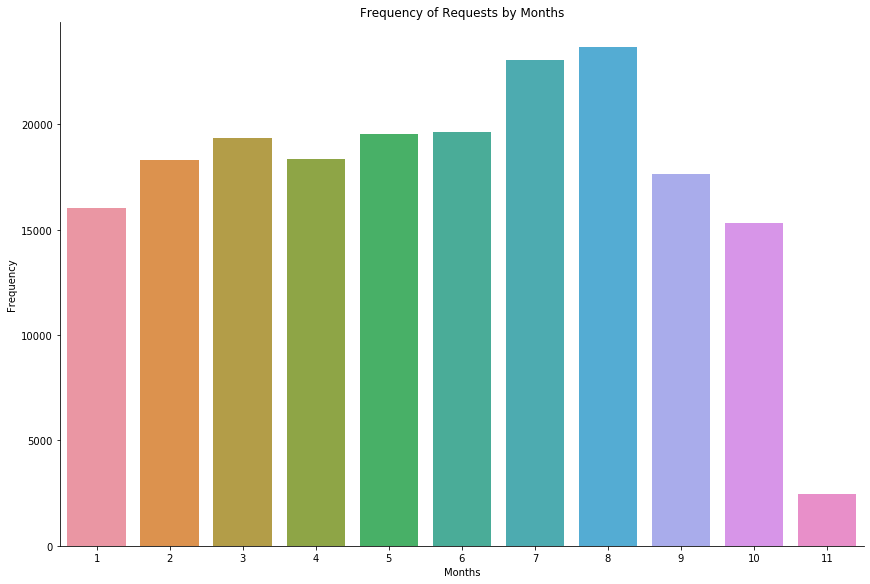

In [8]:
a = sns.catplot(x='month',
            kind='count',
            height=8, 
            aspect=1.5,
            data=df2)

plt.title("Frequency of Requests by Months")
a.set(xlabel="Months",ylabel="Frequency")
plt.show()

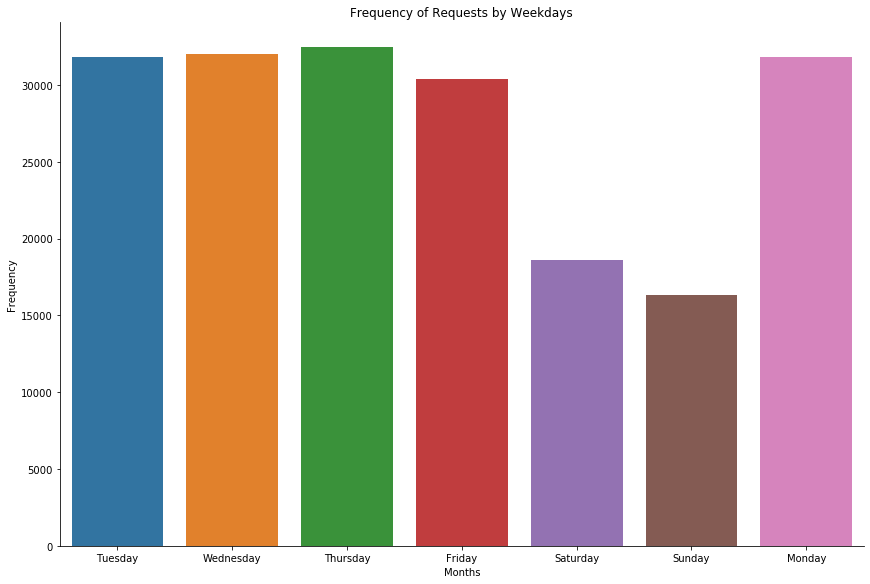

In [9]:
a = sns.catplot(x='dow',
            kind='count',
            height=8, 
            aspect=1.5,
            data=df2)

plt.title("Frequency of Requests by Weekdays")
a.set(xlabel="Months",ylabel="Frequency")
plt.show()

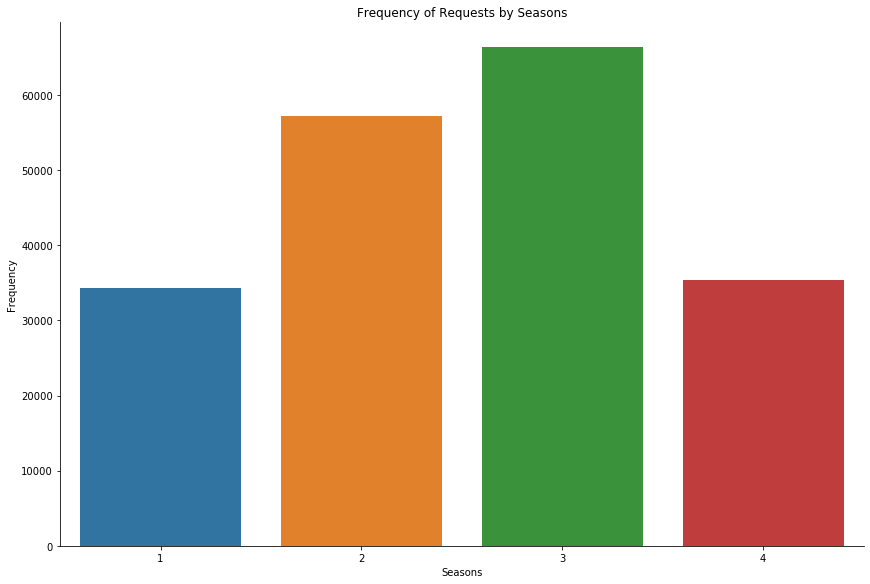

In [10]:
a = sns.catplot(x='season',
            kind='count',
            height=8, 
            aspect=1.5,
            data=df2)

plt.title("Frequency of Requests by Seasons")
a.set(xlabel="Seasons",ylabel="Frequency")
plt.show()

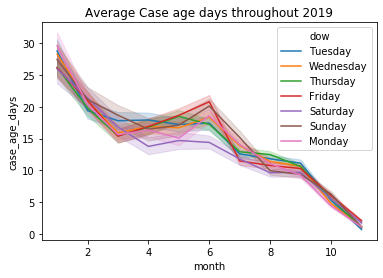

In [11]:
c = sns.lineplot(x="month",
                y="case_age_days",
                hue='dow',
                data=df2
                ).set_title('Average Case age days throughout 2019')
plt.show()

# WordCloud

In [12]:
desc = df2[['public_description']].dropna()

In [13]:
print('In the review dataframe, there are ' + 
      str(desc.shape[0]) + 
      ' observations and ' + 
     str(desc.shape[1]) +
     ' features.')

In the review dataframe, there are 168285 observations and 1 features.


In [14]:
string = (desc.to_string()).lower()

In [15]:
s = stopwords.words('english')
print(s)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

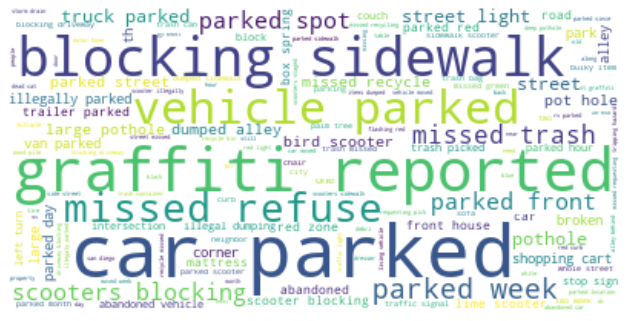

In [16]:
wordcloud = WordCloud(stopwords = s, background_color='white').generate(string)

# Plot
plt.figure(figsize=(11,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# New Dataframe

In [47]:
df2.case_age_days[df2['service_name'] == 'Graffiti Removal'].median()

10.0